In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage.draw

# Add LLMP module to system path
import sys
sys.path.append("../")  # Adds the current directory to the Python path

import LLMP as L

In [10]:
import uuid


# Define the main output directory
main_output_dir = "output"

# Subdirectories for images and JSON files
image_output_dir = os.path.join(main_output_dir, "images")
json_output_dir = os.path.join(main_output_dir, "json")

# Create directories if they don't exist
os.makedirs(image_output_dir, exist_ok=True)
os.makedirs(json_output_dir, exist_ok=True)

# List of tasks and their respective questions
tasks = {
    "position_common_scale": "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.",
    "position_non_aligned_scale": "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.",
    "length": "Please estimate the length of the vertical line (from top to bottom). The height of the whole image is 100. No explanation.",
    "direction": "Please estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.",
    "angle": "Please estimate the angle (0-90 degrees). No explanation.",
    "area": "Please estimate the area covered by the circle. The whole image is 100x100 with an area of 10000. No explanation.",
    "volume": "Please estimate the volume of the cube. The cube size is relative to the image size of 100x100. No explanation.",
    "curvature": "Please estimate the curvature of the line. (0 is no curvature - 1 is the maximum curvature) The more bend the line is, the higher the curvature. No explanation.",
    "shading": "Please estimate the shading density or texture density (range 0 to 100). No explanation."
}

# Number of images to generate for each task
num_images_per_task = 3000

# List to store all data from all tasks
combined_dataset = []

# Loop through each task
for task, question in tasks.items():
    print(f"Generating images and dataset for task: {task}")
    
    # Set up a loop to generate images and collect their labels
    for i in range(num_images_per_task):
        # Generate the image and label for the task using GPImage
    
        image_array, label = L.GPImage.figure1(task)  # Ensure GPImage is defined or imported
        
        # Convert the array to uint8 format (values from 0 to 255)
        image_array_uint8 = (image_array * 255).astype(np.uint8)

        # Convert the NumPy array to a PIL image
        pil_image = Image.fromarray(image_array_uint8)

        # Generate a unique ID for the image
        unique_id = str(uuid.uuid4())

        # Save the image with the unique ID
        image_filename = os.path.join(image_output_dir, f"{unique_id}.jpg")
        pil_image.save(image_filename)

        # Create a JSON entry for the dataset
        json_entry = {
            'id': unique_id,
            'image': f"{unique_id}.jpg",
            'question': question,
            'value': label
        }

        # Append the JSON entry to the combined dataset list
        combined_dataset.append(json_entry)

# Save the combined dataset as a single JSON file in the JSON folder
combined_json_filename = "combined_dataset.json"
combined_json_filepath = os.path.join(json_output_dir, combined_json_filename)

with open(combined_json_filepath, 'w') as json_file:
    json.dump(combined_dataset, json_file, indent=4)

print(f"Images saved in '{image_output_dir}' and combined dataset saved as '{combined_json_filename}' in '{json_output_dir}'")


Generating images and dataset for task: position_common_scale


ValueError: not enough values to unpack (expected 4, got 2)

##  Display the images and verify the corresponding JSON data

In [24]:
# Load the combined JSON dataset
json_file = "output/json/combined_dataset.json"
image_folder = "output/images"

# Read JSON data
with open(json_file, 'r') as f:
    data = json.load(f)

# Display the first 2 images and their corresponding info
for entry in data[:5]: # Adjust slice if you want more images
    image_path = os.path.join(image_folder, entry['image'])
    img = Image.open(image_path)
    img.show()  # Opens the image in the default viewer

    print(f"ID: {entry['id']}")
    print(f"Question: {entry['question']}")
    print(f"Value: {entry['value']}")
    print(f"Image path: {image_path}")
    print("-" * 40)

ID: 202bedb5-e8b7-415b-903b-2d2c9ed18a1e
Question: Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.
Value: 7
Image path: output/images/202bedb5-e8b7-415b-903b-2d2c9ed18a1e.jpg
----------------------------------------
ID: 0d28082b-a48f-4e8b-bd84-d54e92d500e3
Question: Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.
Value: 24
Image path: output/images/0d28082b-a48f-4e8b-bd84-d54e92d500e3.jpg
----------------------------------------
ID: 4227e61c-0753-4424-ac6c-ddd44e0c6d5f
Question: Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.
Value: 6
Image path: output/images/4227e61c-0753-4424-ac6c-ddd44e0c6d5f.jpg
----------------------------------------
ID: f5750e9a-b5b8-4c81-8df1-662b4de39bc4
Ques

## Display images for each task to verify if it correctly label it

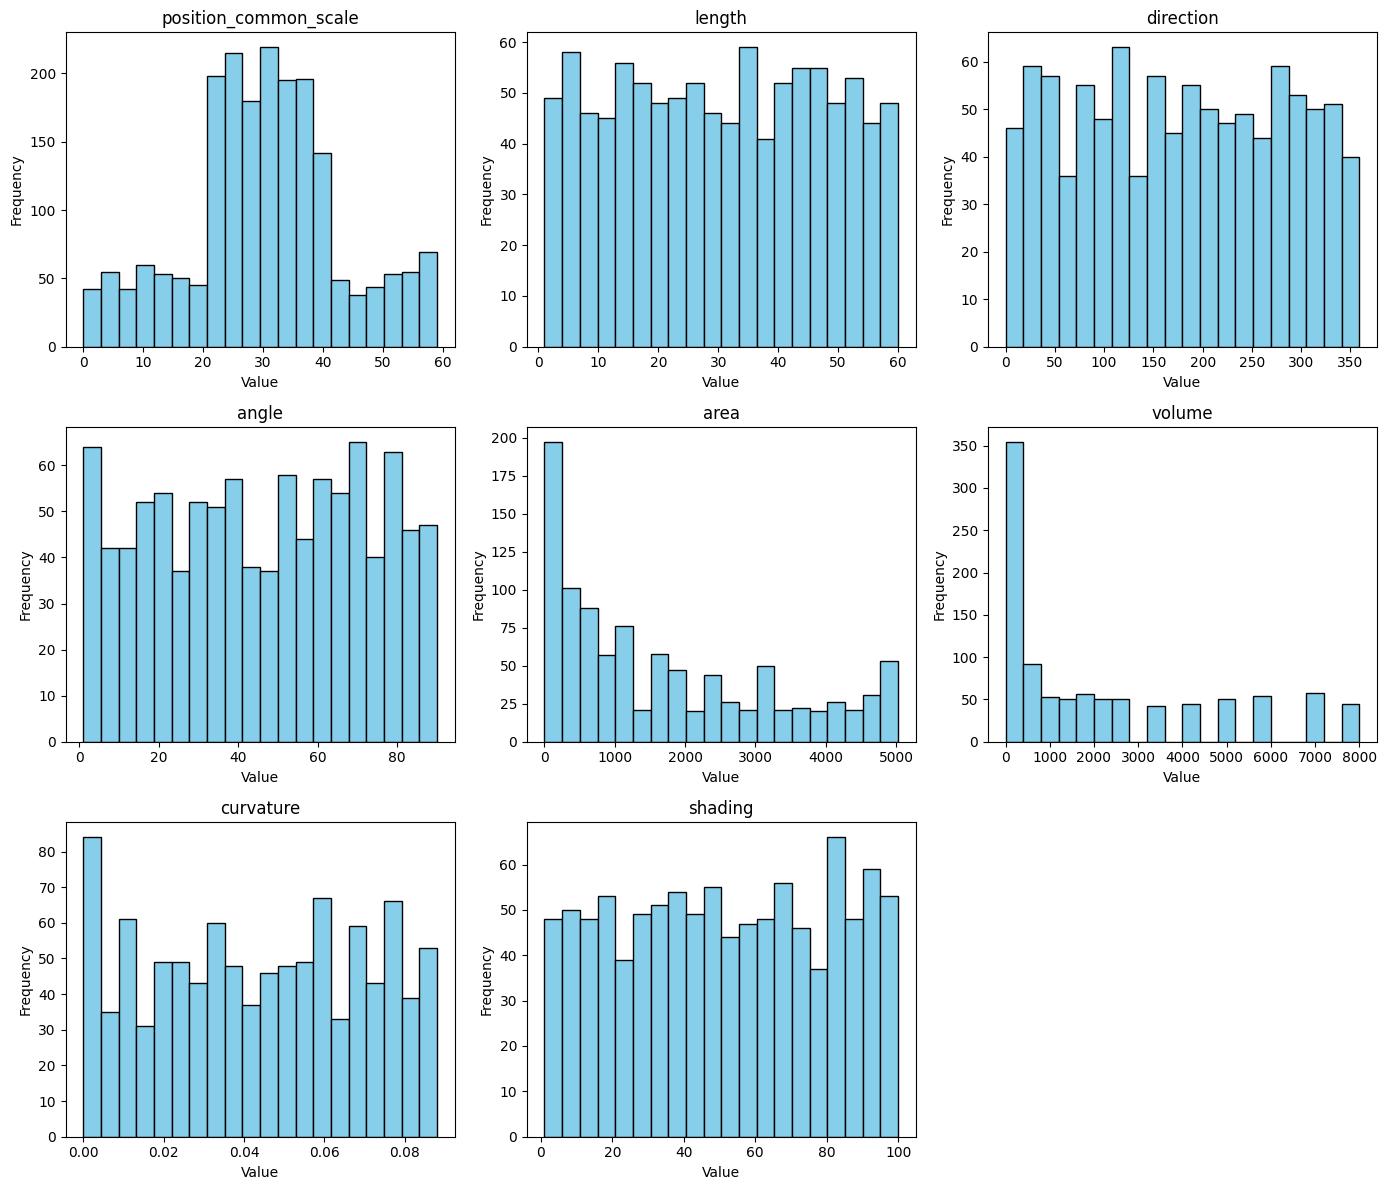

In [29]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the combined JSON dataset
json_filepath = "output/json/combined_dataset.json"

with open(json_filepath, 'r') as f:
    data = json.load(f)

# Create a dictionary to store values for each task
task_values = defaultdict(list)

# Populate the dictionary with values from each task
for entry in data:
    task_question = entry['question']
    value = entry['value']
    task_values[task_question].append(value)

# Mapping of full questions to simplified task names
task_titles = {
    "Please estimate the vertical position of the block relative to the line on the left (Top is 0, Bottom is 60). So the range is 0 - 60. No explanation.": "position_common_scale",
    "Please estimate the length of the vertical line (from top to bottom). The height of the whole image is 100. No explanation.": "length",
    "Please estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.": "direction",
    "Please estimate the angle (0-90 degrees). No explanation.": "angle",
    "Please estimate the area covered by the circle. The whole image is 100x100 with an area of 10000. No explanation.": "area",
    "Please estimate the volume of the cube. The cube size is relative to the image size of 100x100. No explanation.": "volume",
    "Please estimate the curvature of the line. (0 is no curvature - 1 is the maximum curvature) The more bend the line is, the higher the curvature. No explanation.": "curvature",
    "Please estimate the shading density or texture density (range 0 to 100). No explanation.": "shading"
}

# Plot the distributions
plt.figure(figsize=(14, 12))

# Create a histogram for each task
for i, (question, values) in enumerate(task_values.items(), start=1):
    plt.subplot(3, 3, i)  # Adjust subplot grid based on number of tasks
    task_name = task_titles.get(question, "Unknown Task")
    plt.hist(values, bins=20, color='skyblue', edgecolor='black')
    plt.title(task_name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
